In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
plt.rcParams.update({'font.size': 15})

In [2]:
taps = [0.986752+0.162236j, 0.961165+0.275976j, 0.909253+0.416245j, 0.823810+0.566866j, 0.704089+0.710112j, 0.554654+0.832081j, 0.382467+0.923969j, 0.195052+0.980793j, 0.000006+1.000000j, -0.195011+0.980801j, -0.382250+0.924059j, -0.553737+0.832692j, -0.701059+0.713104j, -0.815998+0.578055j, -0.893407+0.449249j, -0.934886+0.354949j, -0.947363+0.320163j, -0.934914+0.354874j, -0.893617+0.448830j, -0.817269+0.576256j, -0.707107+0.707107j, -0.576256+0.817269j, -0.448830+0.893617j, -0.354872+0.934915j, -0.320152+0.947366j, -0.354872+0.934915j, -0.448830+0.893617j, -0.576256+0.817269j, -0.707107+0.707107j, -0.817269+0.576256j, -0.893617+0.448830j, -0.934915+0.354872j, -0.947366+0.320152j, -0.934915+0.354872j, -0.893617+0.448830j, -0.817269+0.576256j, -0.707107+0.707107j, -0.576256+0.817269j, -0.448830+0.893617j, -0.354874+0.934914j, -0.320163+0.947363j, -0.354949+0.934886j, -0.449249+0.893407j, -0.578055+0.815998j, -0.713104+0.701059j, -0.832692+0.553737j, -0.924059+0.382250j, -0.980801+0.195010j, -1.000000-0.000012j, -0.980785-0.195092j, -0.923879-0.382684j, -0.831470-0.555570j, -0.707107-0.707107j, -0.555570-0.831470j, -0.382683-0.923880j, -0.195090-0.980785j, -0.000000-1.000000j, 0.195090-0.980785j, 0.382683-0.923880j, 0.555570-0.831470j, 0.707107-0.707107j, 0.831470-0.555570j, 0.923879-0.382684j, 0.980785-0.195092j, 1.000000-0.000012j, 0.980801+0.195010j, 0.924059+0.382250j, 0.832692+0.553737j, 0.713104+0.701059j, 0.578055+0.815998j, 0.449249+0.893407j, 0.354949+0.934886j, 0.320163+0.947363j, 0.354874+0.934914j, 0.448830+0.893617j, 0.576256+0.817269j, 0.707107+0.707107j, 0.817269+0.576256j, 0.893617+0.448830j, 0.934914+0.354874j, 0.947363+0.320163j, 0.934886+0.354949j, 0.893407+0.449249j, 0.815998+0.578055j, 0.701059+0.713104j, 0.553737+0.832692j, 0.382250+0.924059j, 0.195012+0.980801j, 0.000000+1.000000j, -0.195012+0.980801j, -0.382250+0.924059j, -0.553737+0.832692j, -0.701059+0.713104j, -0.815998+0.578055j, -0.893407+0.449249j, -0.934885+0.354950j, -0.947359+0.320174j, -0.934885+0.354950j, -0.893407+0.449249j, -0.815998+0.578055j, -0.701059+0.713104j, -0.553737+0.832692j, -0.382250+0.924059j, -0.195010+0.980801j, 0.000012+1.000000j, 0.195092+0.980785j, 0.382684+0.923879j, 0.555570+0.831470j, 0.707107+0.707107j, 0.831470+0.555570j, 0.923879+0.382684j, 0.980785+0.195092j, 1.000000+0.000012j, 0.980801-0.195010j, 0.924059-0.382250j, 0.832692-0.553737j, 0.713104-0.701059j, 0.578055-0.815998j, 0.449249-0.893407j, 0.354950-0.934885j, 0.320174-0.947359j, 0.354950-0.934885j, 0.449249-0.893407j, 0.578055-0.815998j, 0.713104-0.701059j, 0.832692-0.553737j, 0.924059-0.382250j, 0.980801-0.195012j, 1.000000-0.000000j, 0.980801+0.195012j, 0.924059+0.382250j, 0.832692+0.553737j, 0.713104+0.701059j, 0.578055+0.815998j, 0.449249+0.893407j, 0.354950+0.934885j, 0.320174+0.947359j, 0.354950+0.934885j, 0.449249+0.893407j, 0.578055+0.815998j, 0.713104+0.701059j, 0.832692+0.553737j, 0.924059+0.382250j, 0.980801+0.195012j, 1.000000-0.000000j, 0.980801-0.195012j, 0.924059-0.382250j, 0.832692-0.553737j, 0.713104-0.701059j, 0.578055-0.815998j, 0.449249-0.893407j, 0.354950-0.934885j, 0.320174-0.947359j, 0.354950-0.934885j, 0.449249-0.893407j, 0.578055-0.815998j, 0.713104-0.701059j, 0.832692-0.553737j, 0.924059-0.382250j, 0.980801-0.195012j, 1.000000-0.000000j, 0.980801+0.195012j, 0.924059+0.382250j, 0.832692+0.553737j, 0.713104+0.701059j, 0.578055+0.815998j, 0.449249+0.893407j, 0.354950+0.934885j, 0.320174+0.947359j, 0.354950+0.934885j, 0.449249+0.893407j, 0.578055+0.815998j, 0.713104+0.701059j, 0.832692+0.553737j, 0.924059+0.382250j, 0.980801+0.195010j, 1.000000-0.000012j, 0.980785-0.195092j, 0.923879-0.382684j, 0.831470-0.555570j, 0.707107-0.707107j, 0.555570-0.831470j, 0.382684-0.923879j, 0.195092-0.980785j, 0.000012-1.000000j, -0.195010-0.980801j, -0.382250-0.924059j, -0.553737-0.832692j, -0.701059-0.713104j, -0.815998-0.578055j, -0.893407-0.449249j, -0.934885-0.354950j, -0.947359-0.320174j, -0.934885-0.354950j, -0.893407-0.449249j, -0.815998-0.578055j, -0.701059-0.713104j, -0.553737-0.832692j, -0.382250-0.924059j, -0.195010-0.980801j, 0.000012-1.000000j, 0.195092-0.980785j, 0.382684-0.923879j, 0.555570-0.831470j, 0.707107-0.707107j, 0.831470-0.555570j, 0.923880-0.382683j, 0.980785-0.195090j, 1.000000-0.000000j, 0.980785+0.195090j, 0.923880+0.382683j, 0.831470+0.555570j, 0.707107+0.707107j, 0.555570+0.831470j, 0.382684+0.923879j, 0.195092+0.980785j, 0.000012+1.000000j, -0.195010+0.980801j, -0.382250+0.924059j, -0.553737+0.832692j, -0.701059+0.713104j, -0.815998+0.578055j, -0.893407+0.449249j, -0.934885+0.354950j, -0.947359+0.320174j, -0.934885+0.354950j, -0.893407+0.449249j, -0.815998+0.578055j, -0.701059+0.713104j, -0.553737+0.832692j, -0.382250+0.924059j, -0.195010+0.980801j, 0.000012+1.000000j, 0.195092+0.980785j, 0.382684+0.923879j, 0.555570+0.831470j, 0.707107+0.707107j, 0.831470+0.555570j, 0.923879+0.382684j, 0.980785+0.195092j, 1.000000+0.000012j, 0.980801-0.195010j, 0.924059-0.382250j, 0.832692-0.553737j, 0.713104-0.701059j, 0.578055-0.815998j, 0.449249-0.893407j, 0.354950-0.934885j, 0.320174-0.947359j, 0.354950-0.934885j, 0.449249-0.893407j, 0.578055-0.815998j, 0.713104-0.701059j, 0.832692-0.553737j, 0.924059-0.382250j, 0.980801-0.195010j, 1.000000+0.000012j, 0.980785+0.195092j, 0.923879+0.382684j, 0.831470+0.555570j, 0.707107+0.707107j, 0.555570+0.831470j, 0.382683+0.923880j, 0.195090+0.980785j, 0.000000+1.000000j, -0.195090+0.980785j, -0.382683+0.923880j, -0.555570+0.831470j, -0.707107+0.707107j, -0.831470+0.555570j, -0.923879+0.382684j, -0.980785+0.195092j, -1.000000+0.000012j, -0.980801-0.195010j, -0.924059-0.382250j, -0.832692-0.553737j, -0.713104-0.701059j, -0.578055-0.815998j, -0.449249-0.893407j, -0.354950-0.934885j, -0.320174-0.947359j, -0.354950-0.934885j, -0.449249-0.893407j, -0.578055-0.815998j, -0.713104-0.701059j, -0.832692-0.553737j, -0.924059-0.382250j, -0.980801-0.195010j, -1.000000+0.000012j, -0.980785+0.195092j, -0.923879+0.382684j, -0.831470+0.555570j, -0.707107+0.707107j, -0.555570+0.831470j, -0.382683+0.923880j, -0.195090+0.980785j, 0.000000+1.000000j, 0.195090+0.980785j, 0.382683+0.923880j, 0.555570+0.831470j, 0.707107+0.707107j, 0.831470+0.555570j, 0.923879+0.382684j, 0.980785+0.195092j, 1.000000+0.000012j, 0.980801-0.195010j, 0.924059-0.382250j, 0.832692-0.553737j, 0.713104-0.701059j, 0.578055-0.815998j, 0.449249-0.893407j, 0.354950-0.934885j, 0.320174-0.947359j, 0.354950-0.934885j, 0.449249-0.893407j, 0.578055-0.815998j, 0.713104-0.701059j, 0.832692-0.553737j, 0.924059-0.382250j, 0.980801-0.195010j, 1.000000+0.000012j, 0.980785+0.195092j, 0.923879+0.382684j, 0.831470+0.555570j, 0.707107+0.707107j, 0.555570+0.831470j, 0.382683+0.923880j, 0.195090+0.980785j, 0.000000+1.000000j, -0.195090+0.980785j, -0.382683+0.923880j, -0.555570+0.831470j, -0.707107+0.707107j, -0.831470+0.555570j, -0.923879+0.382684j, -0.980785+0.195092j, -1.000000+0.000012j, -0.980801-0.195010j, -0.924059-0.382250j, -0.832692-0.553737j, -0.713104-0.701059j, -0.578055-0.815998j, -0.449249-0.893407j, -0.354949-0.934886j, -0.320163-0.947363j, -0.354874-0.934914j, -0.448830-0.893617j, -0.576256-0.817269j, -0.707107-0.707107j, -0.817269-0.576256j, -0.893617-0.448830j, -0.934915-0.354872j, -0.947366-0.320152j, -0.934915-0.354872j, -0.893617-0.448830j, -0.817269-0.576256j, -0.707107-0.707107j, -0.576256-0.817269j, -0.448830-0.893617j, -0.354874-0.934914j, -0.320163-0.947363j, -0.354949-0.934886j, -0.449249-0.893407j, -0.578055-0.815998j, -0.713104-0.701059j, -0.832692-0.553737j, -0.924059-0.382250j, -0.980801-0.195012j, -1.000000+0.000000j, -0.980801+0.195012j, -0.924059+0.382250j, -0.832692+0.553737j, -0.713104+0.701059j, -0.578055+0.815998j, -0.449249+0.893407j, -0.354950+0.934885j, -0.320174+0.947359j, -0.354950+0.934885j, -0.449249+0.893407j, -0.578055+0.815998j, -0.713104+0.701059j, -0.832692+0.553737j, -0.924059+0.382250j, -0.980801+0.195012j, -1.000000+0.000000j, -0.980801-0.195012j, -0.924059-0.382250j, -0.832692-0.553737j, -0.713104-0.701059j, -0.578055-0.815998j, -0.449249-0.893407j, -0.354950-0.934885j, -0.320174-0.947359j, -0.354950-0.934885j, -0.449249-0.893407j, -0.578055-0.815998j, -0.713104-0.701059j, -0.832692-0.553737j, -0.924059-0.382250j, -0.980801-0.195010j, -1.000000+0.000012j, -0.980785+0.195092j, -0.923879+0.382684j, -0.831470+0.555570j, -0.707107+0.707107j, -0.555570+0.831470j, -0.382684+0.923879j, -0.195092+0.980785j, -0.000012+1.000000j, 0.195010+0.980801j, 0.382250+0.924059j, 0.553737+0.832692j, 0.701059+0.713104j, 0.815998+0.578055j, 0.893407+0.449249j, 0.934886+0.354949j, 0.947363+0.320163j, 0.934914+0.354874j, 0.893617+0.448830j, 0.817269+0.576256j, 0.707107+0.707107j, 0.576256+0.817269j, 0.448830+0.893617j, 0.354872+0.934915j, 0.320152+0.947366j, 0.354872+0.934915j, 0.448830+0.893617j, 0.576256+0.817269j, 0.707107+0.707107j, 0.817269+0.576256j, 0.893617+0.448830j, 0.934915+0.354872j, 0.947366+0.320152j, 0.934915+0.354872j, 0.893617+0.448830j, 0.817269+0.576256j, 0.707107+0.707107j, 0.576256+0.817269j, 0.448830+0.893617j, 0.354874+0.934914j, 0.320163+0.947363j, 0.354949+0.934886j, 0.449249+0.893407j, 0.578055+0.815998j, 0.713104+0.701059j, 0.832692+0.553737j, 0.924059+0.382250j, 0.980801+0.195010j, 1.000000-0.000012j, 0.980785-0.195092j, 0.923879-0.382684j, 0.831470-0.555570j, 0.707107-0.707107j, 0.555570-0.831470j, 0.382684-0.923879j, 0.195092-0.980785j, 0.000012-1.000000j, -0.195010-0.980801j, -0.382250-0.924059j, -0.553737-0.832692j, -0.701059-0.713104j, -0.815998-0.578055j, -0.893407-0.449249j, -0.934885-0.354950j, -0.947359-0.320174j, -0.934885-0.354950j, -0.893407-0.449249j, -0.815998-0.578055j, -0.701059-0.713104j, -0.553737-0.832692j, -0.382250-0.924059j, -0.195010-0.980801j, 0.000012-1.000000j, 0.195092-0.980785j, 0.382684-0.923879j, 0.555570-0.831470j, 0.707107-0.707107j, 0.831470-0.555570j, 0.923880-0.382683j, 0.980785-0.195090j, 1.000000-0.000000j, 0.980785+0.195090j, 0.923880+0.382683j, 0.831470+0.555570j, 0.707107+0.707107j, 0.555570+0.831470j, 0.382684+0.923879j, 0.195092+0.980785j, 0.000012+1.000000j, -0.195010+0.980801j, -0.382250+0.924059j, -0.553737+0.832692j, -0.701059+0.713104j, -0.815998+0.578055j, -0.893407+0.449249j, -0.934886+0.354949j, -0.947363+0.320163j, -0.934914+0.354874j, -0.893617+0.448830j, -0.817269+0.576256j, -0.707107+0.707107j, -0.576256+0.817269j, -0.448830+0.893617j, -0.354874+0.934914j, -0.320163+0.947363j, -0.354949+0.934886j, -0.449249+0.893407j, -0.578055+0.815998j, -0.713104+0.701059j, -0.832692+0.553737j, -0.924059+0.382250j, -0.980801+0.195010j, -1.000000-0.000012j, -0.980785-0.195092j, -0.923879-0.382684j, -0.831470-0.555570j, -0.707107-0.707107j, -0.555570-0.831470j, -0.382684-0.923879j, -0.195092-0.980785j, -0.000012-1.000000j, 0.195010-0.980801j, 0.382250-0.924059j, 0.553737-0.832692j, 0.701059-0.713104j, 0.815998-0.578055j, 0.893407-0.449249j, 0.934886-0.354949j, 0.947363-0.320163j, 0.934914-0.354874j, 0.893617-0.448830j, 0.817269-0.576256j, 0.707107-0.707107j, 0.576256-0.817269j, 0.448830-0.893617j, 0.354872-0.934915j, 0.320152-0.947366j, 0.354872-0.934915j, 0.448830-0.893617j, 0.576256-0.817269j, 0.707107-0.707107j, 0.817269-0.576256j, 0.893617-0.448830j, 0.934915-0.354872j, 0.947366-0.320152j, 0.934915-0.354872j, 0.893617-0.448830j, 0.817269-0.576256j, 0.707107-0.707107j, 0.576256-0.817269j, 0.448830-0.893617j, 0.354874-0.934914j, 0.320163-0.947363j, 0.354949-0.934886j, 0.449249-0.893407j, 0.578055-0.815998j, 0.713104-0.701059j, 0.832692-0.553737j, 0.924059-0.382250j, 0.980801-0.195010j, 1.000000+0.000012j, 0.980785+0.195092j, 0.923879+0.382684j, 0.831470+0.555570j, 0.707107+0.707107j, 0.555570+0.831470j, 0.382683+0.923880j, 0.195090+0.980785j, 0.000000+1.000000j, -0.195090+0.980785j, -0.382683+0.923880j, -0.555570+0.831470j, -0.707107+0.707107j, -0.831470+0.555570j, -0.923879+0.382684j, -0.980785+0.195092j, -1.000000+0.000012j, -0.980801-0.195010j, -0.924059-0.382250j, -0.832692-0.553737j, -0.713104-0.701059j, -0.578055-0.815998j, -0.449249-0.893407j, -0.354949-0.934886j, -0.320163-0.947363j, -0.354874-0.934914j, -0.448830-0.893617j, -0.576256-0.817269j, -0.707107-0.707107j, -0.817269-0.576256j, -0.893617-0.448830j, -0.934914-0.354874j, -0.947363-0.320163j, -0.934886-0.354949j, -0.893407-0.449249j, -0.815998-0.578055j, -0.701059-0.713104j, -0.553737-0.832692j, -0.382250-0.924059j, -0.195012-0.980801j, -0.000000-1.000000j, 0.195012-0.980801j, 0.382250-0.924059j, 0.553737-0.832692j, 0.701059-0.713104j, 0.815998-0.578055j, 0.893407-0.449249j, 0.934885-0.354950j, 0.947359-0.320174j, 0.934885-0.354950j, 0.893407-0.449249j, 0.815998-0.578055j, 0.701059-0.713104j, 0.553737-0.832692j, 0.382250-0.924059j, 0.195010-0.980801j, -0.000012-1.000000j, -0.195092-0.980785j, -0.382684-0.923879j, -0.555570-0.831470j, -0.707107-0.707107j, -0.831470-0.555570j, -0.923879-0.382684j, -0.980785-0.195092j, -1.000000-0.000012j, -0.980801+0.195010j, -0.924059+0.382250j, -0.832692+0.553737j, -0.713104+0.701059j, -0.578055+0.815998j, -0.449249+0.893407j, -0.354950+0.934885j, -0.320174+0.947359j, -0.354950+0.934885j, -0.449249+0.893407j, -0.578055+0.815998j, -0.713104+0.701059j, -0.832692+0.553737j, -0.924059+0.382250j, -0.980801+0.195012j, -1.000000+0.000000j, -0.980801-0.195012j, -0.924059-0.382250j, -0.832692-0.553737j, -0.713104-0.701059j, -0.578055-0.815998j, -0.449249-0.893407j, -0.354950-0.934885j, -0.320174-0.947359j, -0.354950-0.934885j, -0.449249-0.893407j, -0.578055-0.815998j, -0.713104-0.701059j, -0.832692-0.553737j, -0.924059-0.382250j, -0.980801-0.195012j, -1.000000+0.000000j, -0.980801+0.195012j, -0.924059+0.382250j, -0.832692+0.553737j, -0.713104+0.701059j, -0.578055+0.815998j, -0.449249+0.893407j, -0.354950+0.934885j, -0.320174+0.947359j, -0.354950+0.934885j, -0.449249+0.893407j, -0.578055+0.815998j, -0.713104+0.701059j, -0.832692+0.553737j, -0.924059+0.382250j, -0.980801+0.195012j, -1.000000+0.000000j, -0.980801-0.195012j, -0.924059-0.382250j, -0.832692-0.553737j, -0.713104-0.701059j, -0.578055-0.815998j, -0.449249-0.893407j, -0.354950-0.934885j, -0.320174-0.947359j, -0.354950-0.934885j, -0.449249-0.893407j, -0.578055-0.815998j, -0.713104-0.701059j, -0.832692-0.553737j, -0.924059-0.382250j, -0.980801-0.195010j, -1.000000+0.000012j, -0.980785+0.195092j, -0.923879+0.382684j, -0.831470+0.555570j, -0.707107+0.707107j, -0.555570+0.831470j, -0.382684+0.923879j, -0.195092+0.980785j, -0.000012+1.000000j, 0.195010+0.980801j, 0.382250+0.924059j, 0.553737+0.832692j, 0.701059+0.713104j, 0.815998+0.578055j, 0.893407+0.449249j, 0.934885+0.354950j, 0.947359+0.320174j, 0.934885+0.354950j, 0.893407+0.449249j, 0.815998+0.578055j, 0.701059+0.713104j, 0.553737+0.832692j, 0.382250+0.924059j, 0.195010+0.980801j, -0.000012+1.000000j, -0.195092+0.980785j, -0.382684+0.923879j, -0.555570+0.831470j, -0.707107+0.707107j, -0.831470+0.555570j, -0.923880+0.382683j, -0.980785+0.195090j, -1.000000+0.000000j, -0.980785-0.195090j, -0.923880-0.382683j, -0.831470-0.555570j, -0.707107-0.707107j, -0.555570-0.831470j, -0.382684-0.923879j, -0.195092-0.980785j, -0.000012-1.000000j, 0.195010-0.980801j, 0.382250-0.924059j, 0.553737-0.832692j, 0.701059-0.713104j, 0.815998-0.578055j, 0.893407-0.449249j, 0.934885-0.354950j, 0.947359-0.320174j, 0.934885-0.354950j, 0.893407-0.449249j, 0.815998-0.578055j, 0.701059-0.713104j, 0.553737-0.832692j, 0.382250-0.924059j, 0.195010-0.980801j, -0.000012-1.000000j, -0.195092-0.980785j, -0.382684-0.923879j, -0.555570-0.831470j, -0.707107-0.707107j, -0.831470-0.555570j, -0.923879-0.382684j, -0.980785-0.195092j, -1.000000-0.000012j, -0.980801+0.195010j, -0.924059+0.382250j, -0.832692+0.553737j, -0.713104+0.701059j, -0.578055+0.815998j, -0.449249+0.893407j, -0.354950+0.934885j, -0.320174+0.947359j, -0.354950+0.934885j, -0.449249+0.893407j, -0.578055+0.815998j, -0.713104+0.701059j, -0.832692+0.553737j, -0.924059+0.382250j, -0.980801+0.195010j, -1.000000-0.000012j, -0.980785-0.195092j, -0.923879-0.382684j, -0.831470-0.555570j, -0.707107-0.707107j, -0.555570-0.831470j, -0.382683-0.923880j, -0.195090-0.980785j, -0.000000-1.000000j, 0.195090-0.980785j, 0.382683-0.923880j, 0.555570-0.831470j, 0.707107-0.707107j, 0.831470-0.555570j, 0.923879-0.382684j, 0.980785-0.195092j, 1.000000-0.000012j, 0.980801+0.195010j, 0.924059+0.382250j, 0.832692+0.553737j, 0.713104+0.701059j, 0.578055+0.815998j, 0.449249+0.893407j, 0.354950+0.934885j, 0.320174+0.947359j, 0.354950+0.934885j, 0.449249+0.893407j, 0.578055+0.815998j, 0.713104+0.701059j, 0.832692+0.553737j, 0.924059+0.382250j, 0.980801+0.195010j, 1.000000-0.000012j, 0.980785-0.195092j, 0.923879-0.382684j, 0.831470-0.555570j, 0.707107-0.707107j, 0.555570-0.831470j, 0.382683-0.923880j, 0.195090-0.980785j, -0.000000-1.000000j, -0.195090-0.980785j, -0.382683-0.923880j, -0.555570-0.831470j, -0.707107-0.707107j, -0.831470-0.555570j, -0.923879-0.382684j, -0.980785-0.195092j, -1.000000-0.000012j, -0.980801+0.195010j, -0.924059+0.382250j, -0.832692+0.553737j, -0.713104+0.701059j, -0.578055+0.815998j, -0.449249+0.893407j, -0.354950+0.934885j, -0.320174+0.947359j, -0.354950+0.934885j, -0.449249+0.893407j, -0.578055+0.815998j, -0.713104+0.701059j, -0.832692+0.553737j, -0.924059+0.382250j, -0.980801+0.195010j, -1.000000-0.000012j, -0.980785-0.195092j, -0.923879-0.382684j, -0.831470-0.555570j, -0.707107-0.707107j, -0.555570-0.831470j, -0.382683-0.923880j, -0.195090-0.980785j, -0.000000-1.000000j, 0.195090-0.980785j, 0.382683-0.923880j, 0.555570-0.831470j, 0.707107-0.707107j, 0.831470-0.555570j, 0.923879-0.382684j, 0.980785-0.195092j, 1.000000-0.000012j, 0.980801+0.195010j, 0.924059+0.382250j, 0.832692+0.553737j, 0.713104+0.701059j, 0.578055+0.815998j, 0.449249+0.893407j, 0.354949+0.934886j, 0.320163+0.947363j, 0.354874+0.934914j, 0.448830+0.893617j, 0.576256+0.817269j, 0.707107+0.707107j, 0.817269+0.576256j, 0.893617+0.448830j, 0.934915+0.354872j, 0.947366+0.320152j, 0.934915+0.354872j, 0.893617+0.448830j, 0.817269+0.576256j, 0.707107+0.707107j, 0.576256+0.817269j, 0.448830+0.893617j, 0.354874+0.934914j, 0.320163+0.947363j, 0.354949+0.934886j, 0.449249+0.893407j, 0.578055+0.815998j, 0.713104+0.701059j, 0.832692+0.553737j, 0.924059+0.382250j, 0.980801+0.195012j, 1.000000-0.000000j, 0.980801-0.195012j, 0.924059-0.382250j, 0.832692-0.553737j, 0.713104-0.701059j, 0.578055-0.815998j, 0.449249-0.893407j, 0.354950-0.934885j, 0.320174-0.947359j, 0.354950-0.934885j, 0.449249-0.893407j, 0.578055-0.815998j, 0.713104-0.701059j, 0.832692-0.553737j, 0.924059-0.382250j, 0.980801-0.195012j, 1.000000-0.000000j, 0.980801+0.195012j, 0.924059+0.382250j, 0.832692+0.553737j, 0.713104+0.701059j, 0.578055+0.815998j, 0.449249+0.893407j, 0.354949+0.934886j, 0.320163+0.947363j, 0.354874+0.934914j, 0.448830+0.893617j, 0.576256+0.817269j, 0.707107+0.707107j, 0.817269+0.576256j, 0.893617+0.448830j, 0.934915+0.354872j, 0.947366+0.320152j, 0.934915+0.354872j, 0.893617+0.448830j, 0.817269+0.576256j, 0.707107+0.707107j, 0.576256+0.817269j, 0.448830+0.893617j, 0.354874+0.934914j, 0.320163+0.947363j, 0.354949+0.934886j, 0.449249+0.893407j, 0.578055+0.815998j, 0.713104+0.701059j, 0.832692+0.553737j, 0.924059+0.382250j, 0.980801+0.195010j, 1.000000-0.000012j, 0.980785-0.195092j, 0.923879-0.382684j, 0.831470-0.555570j, 0.707107-0.707107j, 0.555570-0.831470j, 0.382684-0.923879j, 0.195092-0.980785j, 0.000012-1.000000j, -0.195010-0.980801j, -0.382250-0.924059j, -0.553737-0.832692j, -0.701059-0.713104j, -0.815998-0.578055j, -0.893407-0.449249j, -0.934886-0.354949j, -0.947363-0.320163j, -0.934914-0.354874j, -0.893617-0.448830j, -0.817269-0.576256j, -0.707107-0.707107j, -0.576256-0.817269j, -0.448830-0.893617j, -0.354874-0.934914j, -0.320163-0.947363j, -0.354949-0.934886j, -0.449249-0.893407j, -0.578055-0.815998j, -0.713104-0.701059j, -0.832692-0.553737j, -0.924059-0.382250j, -0.980801-0.195010j, -1.000000+0.000012j, -0.980785+0.195092j, -0.923879+0.382684j, -0.831470+0.555570j, -0.707107+0.707107j, -0.555570+0.831470j, -0.382684+0.923879j, -0.195092+0.980785j, -0.000012+1.000000j, 0.195010+0.980801j, 0.382250+0.924059j, 0.553737+0.832692j, 0.701059+0.713104j, 0.815998+0.578055j, 0.893407+0.449249j, 0.934885+0.354950j, 0.947359+0.320174j, 0.934885+0.354950j, 0.893407+0.449249j, 0.815998+0.578055j, 0.701059+0.713104j, 0.553737+0.832692j, 0.382250+0.924059j, 0.195010+0.980801j, -0.000012+1.000000j, -0.195092+0.980785j, -0.382684+0.923879j, -0.555570+0.831470j, -0.707107+0.707107j, -0.831470+0.555570j, -0.923880+0.382683j, -0.980785+0.195090j, -1.000000+0.000000j, -0.980785-0.195090j, -0.923880-0.382683j, -0.831470-0.555570j, -0.707107-0.707107j, -0.555570-0.831470j, -0.382684-0.923879j, -0.195092-0.980785j, -0.000012-1.000000j, 0.195010-0.980801j, 0.382250-0.924059j, 0.553737-0.832692j, 0.701059-0.713104j, 0.815998-0.578055j, 0.893407-0.449249j, 0.934886-0.354949j, 0.947363-0.320163j, 0.934914-0.354874j, 0.893617-0.448830j, 0.817269-0.576256j, 0.707107-0.707107j, 0.576256-0.817269j, 0.448830-0.893617j, 0.354873-0.934914j, 0.320157-0.947364j, 0.354911-0.934900j, 0.449039-0.893512j, 0.577156-0.816634j, 0.710112-0.704089j, 0.825057-0.565049j, 0.909448-0.415819j, 0.961187-0.275898j]
fs = 4e3

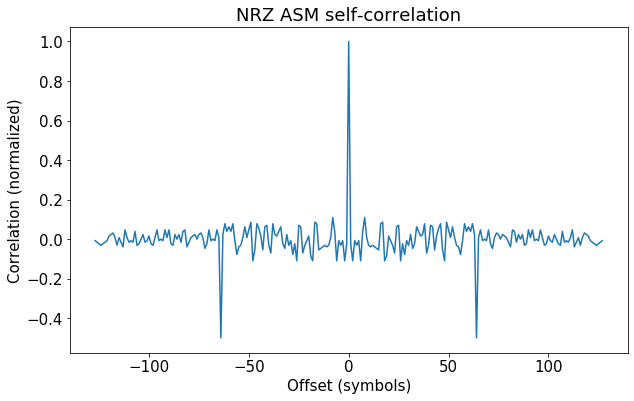

In [3]:
a = [0x03, 0x47, 0x76, 0xC7, 0x27, 0x28, 0x95, 0xB0, 0xFC, 0xB8, 0x89, 0x38, 0xD8, 0xD7, 0x6A, 0x4F]
# Note the ASM is made by concatenation of the 32-bit ASM + 32-bit ASM inverted, hence the large sidelobes
asm_bits = np.unpackbits(np.array(a, dtype='uint8'))
asm_bits = 2*asm_bits.astype('float')-1
plt.figure(figsize = (10,6), facecolor = 'w')
corr = np.correlate(asm_bits, asm_bits, mode = 'full')
corr /= np.max(corr)
plt.plot(np.arange(corr.size) - corr.size//2, corr)
plt.title('NRZ ASM self-correlation')
plt.ylabel('Correlation (normalized)')
plt.xlabel('Offset (symbols)')
plt.savefig('images/asm_corr.png', dpi = 300, bbox_inches = 'tight');

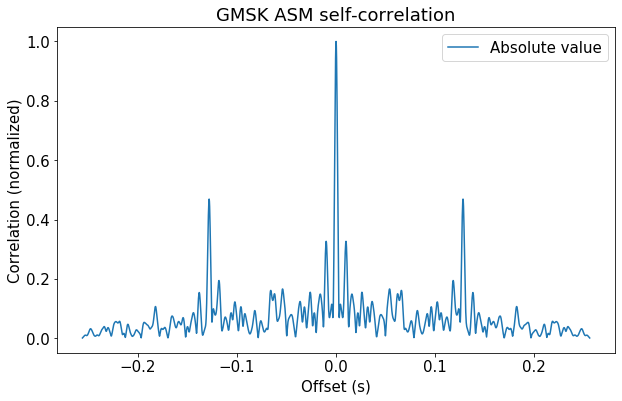

In [4]:
plt.figure(figsize = (10,6), facecolor = 'w')
corr = np.correlate(np.conj(taps), np.conj(taps), mode = 'full')
corr /= np.max(np.abs(corr))
time = (np.arange(corr.size) - corr.size//2) / fs
plt.plot(time, np.abs(corr))
plt.title('GMSK ASM self-correlation')
plt.ylabel('Correlation (normalized)')
plt.xlabel('Offset (s)')
plt.legend(['Absolute value'])
plt.savefig('images/asm_gmsk_abs.png', dpi = 300, bbox_inches = 'tight');

Correlation sidelobes

In [5]:
a = np.abs(corr)[np.abs(corr) > 0.25]
a[scipy.signal.argrelextrema(a, np.greater)]

array([0.46889654, 0.32656248, 1.        , 0.32656248, 0.46889654])

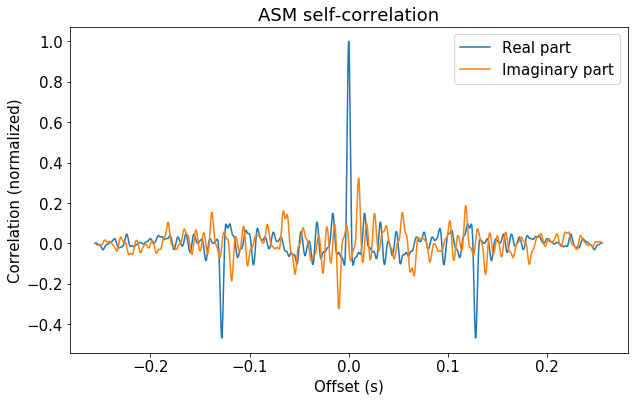

In [6]:
plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(time, corr.real, label = 'Real part')
plt.plot(time, corr.imag, label = 'Imaginary part')
plt.title('ASM self-correlation')
plt.ylabel('Correlation (normalized)')
plt.xlabel('Offset (s)')
plt.legend()
plt.savefig('images/asm_gmsk_iq.png', dpi = 300, bbox_inches = 'tight');

In [7]:
def process_data(path, noise_sel, threshold, freq_offset = 0):
    name = path.split('/')[-1].split('.')[0]
    asms = np.fromfile(path, dtype = 'complex64').reshape((-1,1024))
    
    plt.figure()
    asm_max_in_f = np.max(np.abs(asms), axis = 1)
    plt.plot(asm_max_in_f)
    
    corr_per_f = np.fft.fftshift(np.average(np.abs(asms[:])**2, axis = 0))
    plt.figure()
    plt.plot(corr_per_f)
    plt.plot(noise_sel, corr_per_f[noise_sel], '.')
    
    asms /= np.sqrt(np.average(corr_per_f[noise_sel]))
    asm_max_in_f = np.max(np.abs(asms), axis = 1)
    
    plt.figure()
    plt.axhline(y = threshold, linestyle = '--', color = 'red')
    plt.plot(asm_max_in_f)
    
    sel_thresh = asm_max_in_f > threshold
    lmax = np.where(sel_thresh)[0][scipy.signal.argrelextrema(asm_max_in_f[sel_thresh], np.greater)][:-2]
    # Filter out sidelobes
    lmax = lmax[np.concatenate((~((lmax[1:] - lmax[:-1] < 1000) & (asm_max_in_f[lmax[1:]] > asm_max_in_f[lmax[:-1]])), [True]))]
    lmax = lmax[np.concatenate(([True], ~((lmax[1:] - lmax[:-1] < 1000) & (asm_max_in_f[lmax[1:]] < asm_max_in_f[lmax[:-1]]))))]
    freq_max = np.argmax(np.abs(asms[lmax]), axis = 1)
    
    fig, ax = plt.subplots(2,1,figsize = (12, 10), facecolor = 'w')
    for l,f in zip(lmax, freq_max):
        ax[0].plot((np.arange(2*len(taps)) - len(taps)) / fs,\
                   np.abs(asms[l-len(taps):l+len(taps),f]), color = 'C0', alpha = 0.1)
        ax[1].plot((np.arange(200) - 100) / fs,\
                   np.abs(asms[l-100:l+100,f]), color = 'C0', alpha = 0.1)
    for a in ax:
        a.set_xlabel('Offset (s)')
        a.set_ylabel('Correlation')
    ax[0].set_title('Detected ASMs')
    plt.savefig(f'images/asm_peaks_{name}.png', dpi = 300, bbox_inches = 'tight')
    
    fig, ax1 = plt.subplots(figsize = (12, 6), facecolor = 'w')
    ax2 = ax1.twinx()
    peaks = 10*np.log10(np.abs(asms[lmax,freq_max])**2-1) + 10*np.log10(fs/asms.shape[1]) - 10*np.log10(250)
    wide_window = 5
    peaks_wide = 10*np.log10(np.sum(np.abs(asms[lmax.reshape((-1,1)),freq_max.reshape((-1,1))+np.arange(-wide_window,1+wide_window).reshape((1,-1))])**2 - 1, axis = 1)) \
        + 10*np.log10(fs/asms.shape[1]) - 10*np.log10(250)
    ax2.plot(np.fft.fftfreq(len(taps), 1/fs)[freq_max] + freq_offset, 'x-', color = 'C3')
    ax1.plot(peaks, 'o-')
    ax1.plot(peaks_wide, 'o-')
    ax1.set_title('Correlation peaks')
    ax1.set_xlabel('ASM detection number')
    ax1.set_ylabel('Correlation EbN0 (dB)')
    ax2.set_ylabel('Frequency (Hz)');
    fig.legend(['Correlation (with scalloping loss)', 'Correlation (no scalloping loss)', 'Frequency'])
    plt.savefig(f'images/asm_detection_{name}.png', dpi = 300, bbox_inches = 'tight')

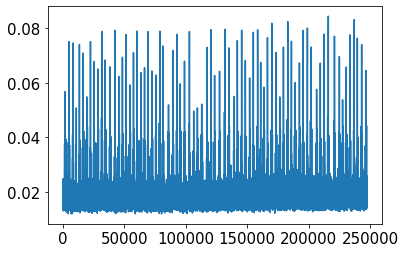

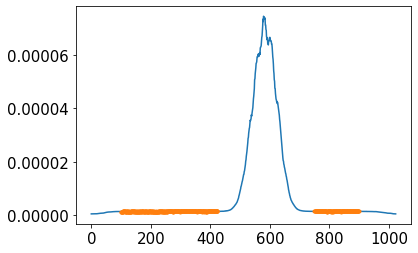

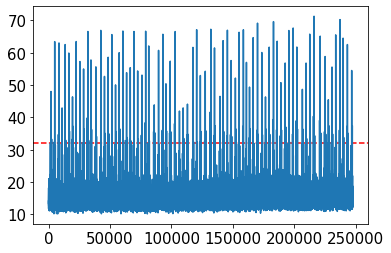

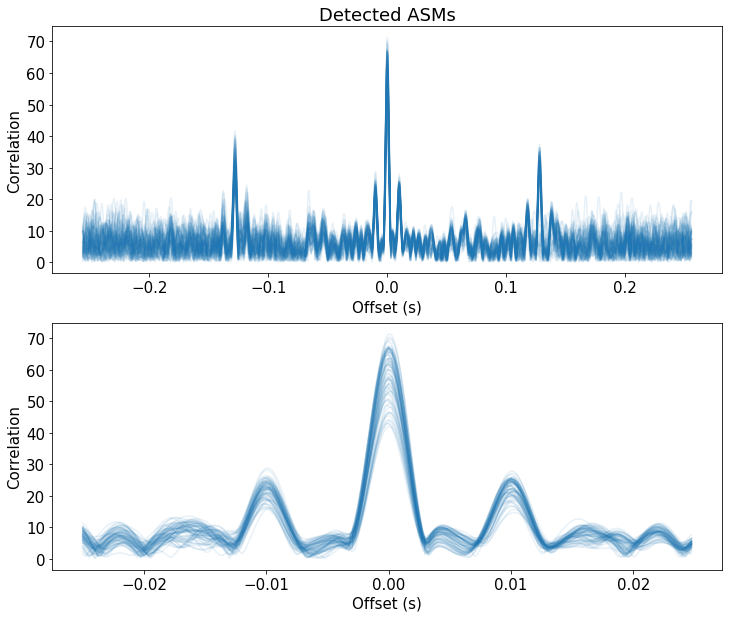

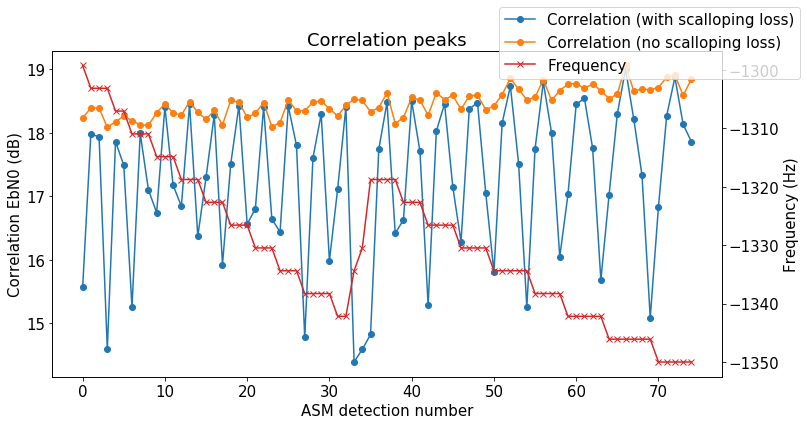

In [8]:
process_data('data/dwingeloo_fft.c64', np.concatenate((np.arange(100,425), np.arange(750,900))), 32, freq_offset = -1600)

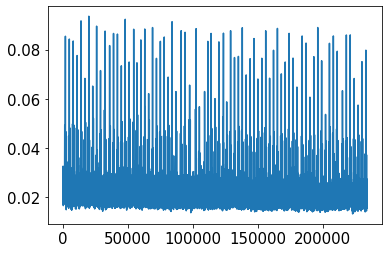

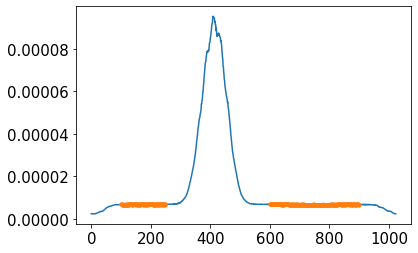

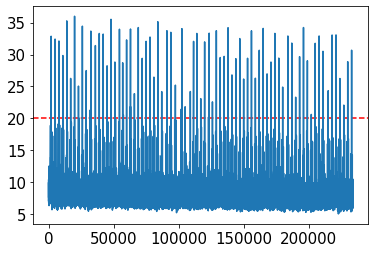

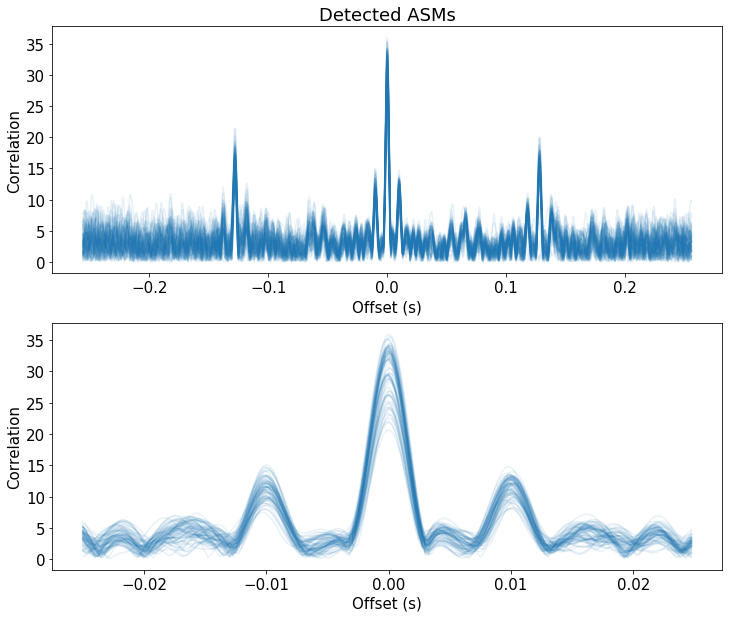

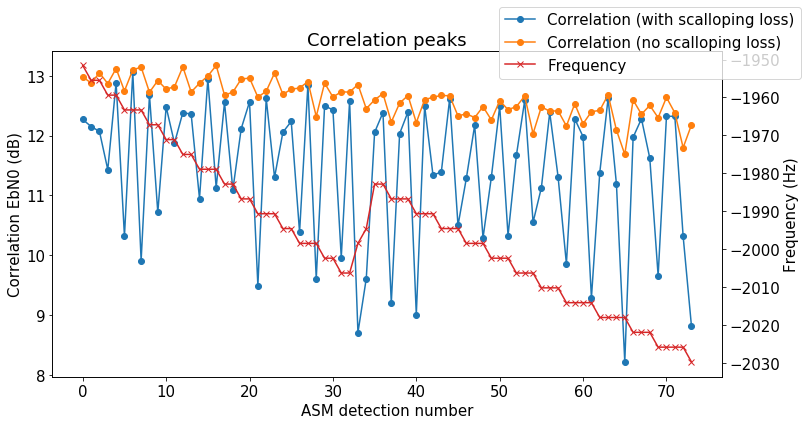

In [9]:
process_data('data/wakayama_fft.c64', np.concatenate((np.arange(100,250), np.arange(600,900))), 20, freq_offset = -1600)

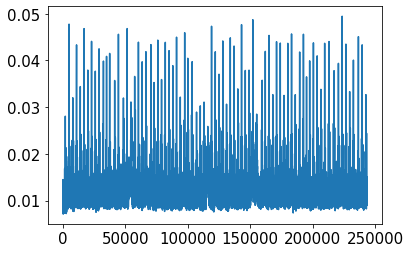

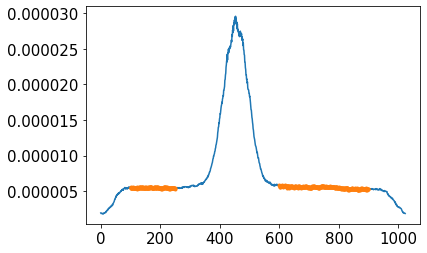

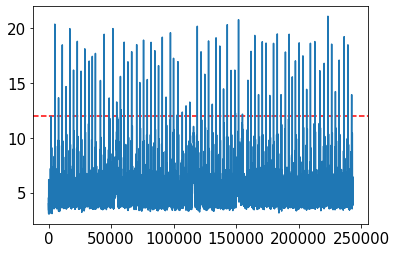

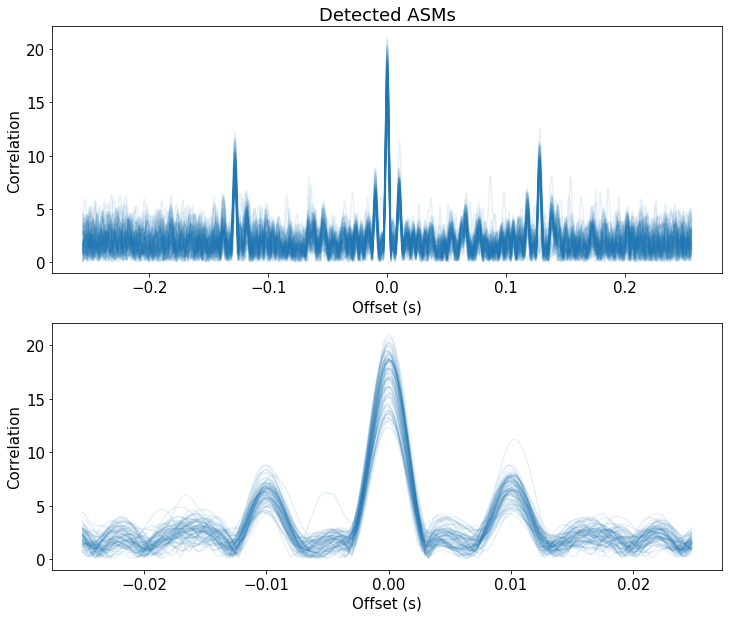

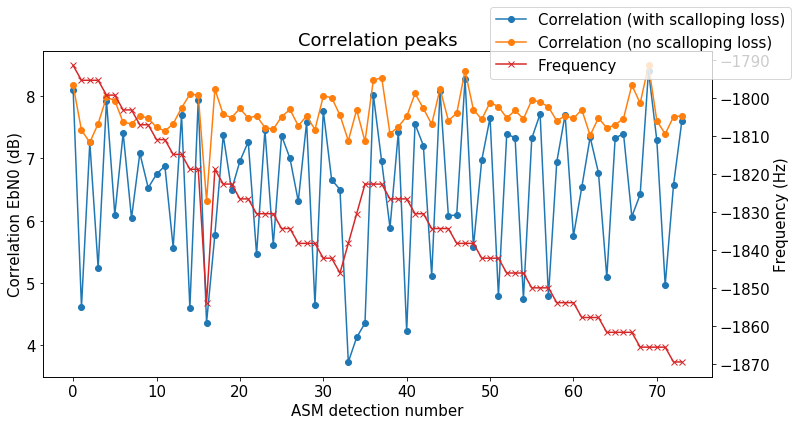

In [10]:
process_data('data/shahe_fft.c64', np.concatenate((np.arange(100,250), np.arange(600,900))), 12, freq_offset = -1600)

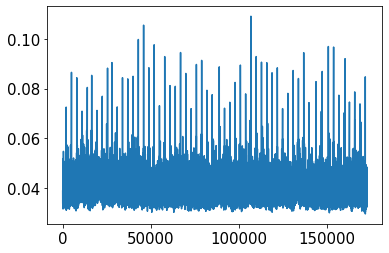

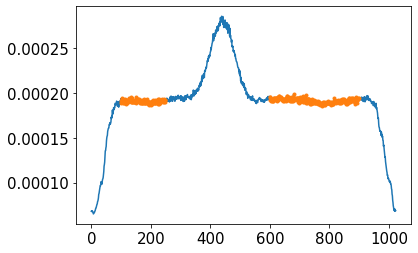

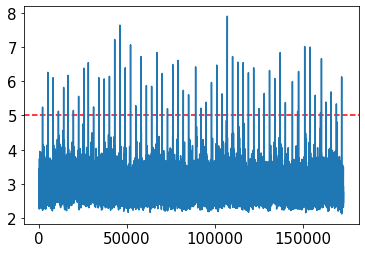

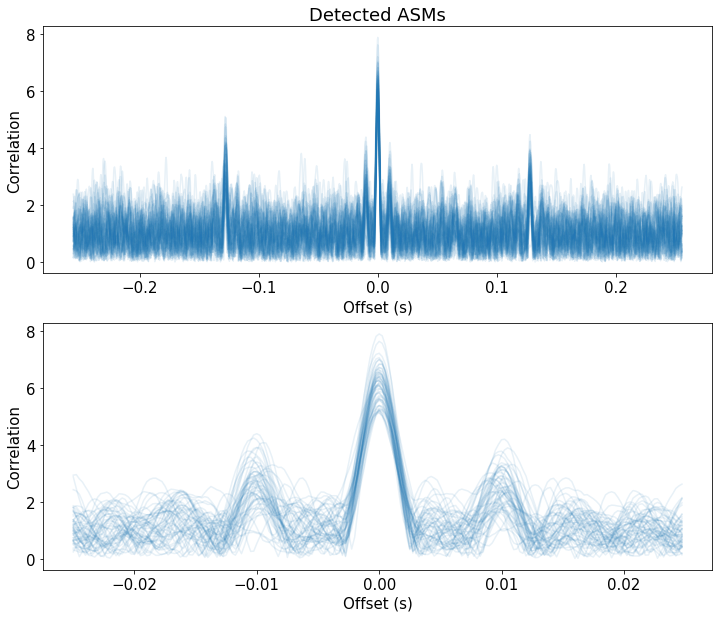

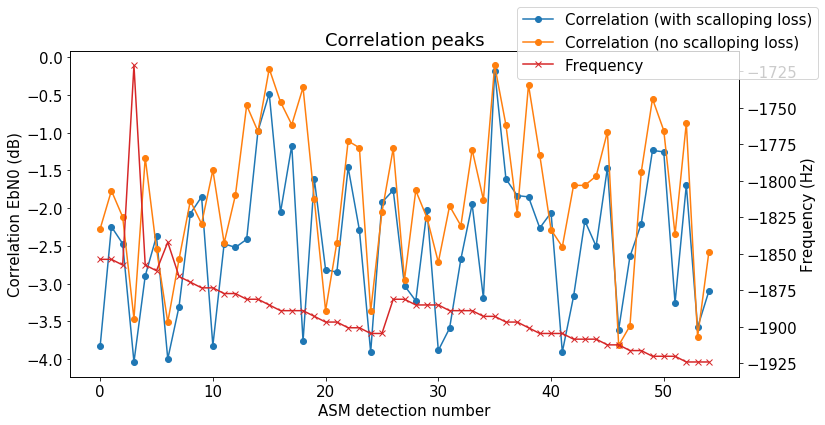

In [11]:
process_data('data/harbin_fft.c64', np.concatenate((np.arange(100,250), np.arange(600,900))), 5, freq_offset = -1600)

Validation of the EbN0 calculation using the correlation. We compute EbN0 from the spectrum of the recording.

In [12]:
def spectrum(path, skip):
    with open(path, 'rb') as f:
        f.seek((skip + 10 * 40000) * 8)
        x = np.fromfile(f, dtype = 'complex64', count = 400000)
    N = 4096
    return np.fft.fftshift(np.average(np.abs(np.fft.fft(x[:x.size//N*N].reshape((-1,N))))**2, axis = 0))

In [13]:
dwingeloo = spectrum('/mnt/disk/dslwp/charon.camras.nl/public/dslwp-b/c64/meta_B_436_Dwingeloo_2019-07-05.raw',\
                    38440000)
wakayama = spectrum('/mnt/disk/dslwp/charon.camras.nl/public/dslwp-b/c64/meta_B_436_Wakayama_2019-07-05.raw',\
                    91894696)
shahe = spectrum('/mnt/disk/dslwp/china/new/c64/meta_B_436_Shahe_1562311500_1562319300.raw',\
                36977196)
harbin = spectrum('/mnt/disk/dslwp/china/new/c64/meta_B_436_Harbin_1562311740_1562319060.raw',\
                 27377251)

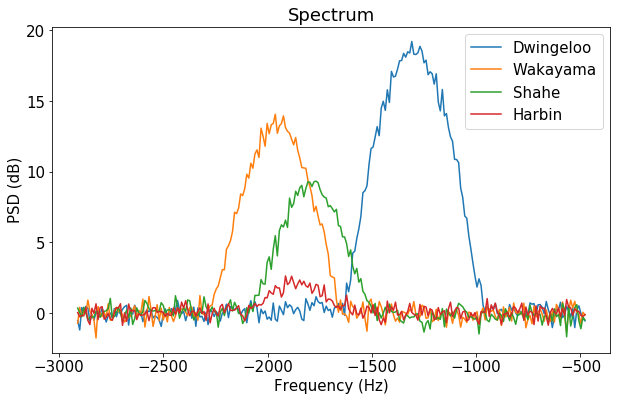

In [14]:
N = 4096
dwingeloo /= np.average(dwingeloo[1000:1500])
wakayama /= np.average(wakayama[1000:1500])
shahe /= np.average(shahe[1000:1500])
harbin /= np.average(harbin[1000:1500])
sel = slice(1750,2000)
plt.figure(figsize = (10,6), facecolor = 'w')
freq = np.fft.fftshift(np.fft.fftfreq(N, 1/40e3))[sel]
plt.plot(freq, 10*np.log10(dwingeloo[sel]))
plt.plot(freq, 10*np.log10(wakayama[sel]))
plt.plot(freq, 10*np.log10(shahe[sel]))
plt.plot(freq, 10*np.log10(harbin[sel]))
plt.legend(['Dwingeloo', 'Wakayama', 'Shahe', 'Harbin'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.title('Spectrum')
plt.savefig('images/spectrum.png', dpi = 300, bbox_inches = 'tight');